Name- Aavighan Sharma
Branch- CSEAIML
SECTION- A
ROLL NO.- 20240110040002
PROBLEM STATEMENT- Pathfinding with A* Algorithm

In [2]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Node:
    """Class to represent a node in the A* algorithm."""
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start node
        self.h = 0  # Heuristic cost (estimated)
        self.f = 0  # Total cost (g + h)

    def __lt__(self, other):
        return self.f < other.f  # Needed for priority queue sorting

def heuristic(a, b):
    """Manhattan Distance Heuristic."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    """A* algorithm to find the shortest path."""
    open_list = []
    closed_set = set()

    start_node = Node(start)
    goal_node = Node(goal)
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)
        closed_set.add(current_node.position)

        # If goal is reached, reconstruct path
        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Reverse path to get correct order

        x, y = current_node.position
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]  # Allowed moves

        for next_pos in neighbors:
            if next_pos in closed_set or not (0 <= next_pos[0] < len(grid) and 0 <= next_pos[1] < len(grid[0])):
                continue
            if grid[next_pos[0]][next_pos[1]] == 1:  # If obstacle, skip
                continue

            neighbor = Node(next_pos, current_node)
            neighbor.g = current_node.g + 1
            neighbor.h = heuristic(next_pos, goal)
            neighbor.f = neighbor.g + neighbor.h

            heapq.heappush(open_list, neighbor)

    return None  # No path found


In [4]:
def visualize(grid, path, start, goal):
    """Displays the grid and the shortest path using Matplotlib."""
    grid = np.array(grid)
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="Greys", origin="upper")

    # Plot the path
    if path:
        for step in path:
            plt.scatter(step[1], step[0], marker='o', color='red', label="Path")
    plt.scatter(start[1], start[0], marker='s', color='blue', label="Start")
    plt.scatter(goal[1], goal[0], marker='X', color='green', label="Goal")

    plt.legend()
    plt.grid()
    plt.show()


In [14]:
# User Input for Grid Size
rows = int(input("Enter number of rows: "))
cols = int(input("Enter number of columns: "))
grid = [[0] * cols for _ in range(rows)]

# Taking obstacle inputs
num_obstacles = int(input("Enter number of obstacles: "))
for _ in range(num_obstacles):
    r, c = map(int, input("Enter obstacle coordinates (row col): ").split())
    grid[r][c] = 1  # Mark obstacles as 1

# Taking start and goal points
start = tuple(map(int, input("Enter start position (row col): ").split()))
goal = tuple(map(int, input("Enter goal position (row col): ").split()))


Enter number of rows: 5
Enter number of columns: 5
Enter number of obstacles: 6
Enter obstacle coordinates (row col): 2 1
Enter obstacle coordinates (row col): 2 2
Enter obstacle coordinates (row col): 2 3
Enter obstacle coordinates (row col): 3 1
Enter obstacle coordinates (row col): 3 3
Enter obstacle coordinates (row col): 3 2
Enter start position (row col): 0 0
Enter goal position (row col): 4 4


Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


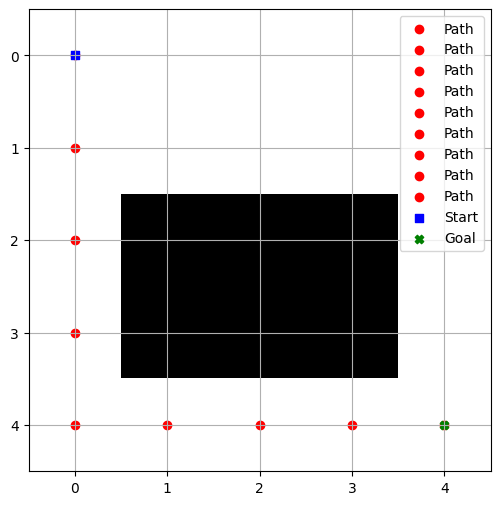

In [16]:
# Run A* algorithm
path = astar(grid, start, goal)

# Display the results
if path:
    print("Path found:", path)
    visualize(grid, path, start, goal)
else:
    print("No path found!")
